time step = 0.05


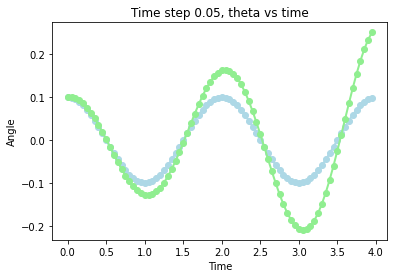

time step = 0.025


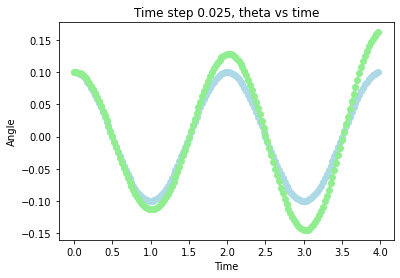

time step = 0.0125


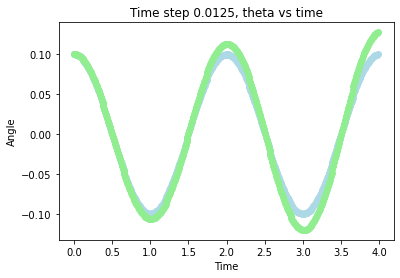

time step = 0.001


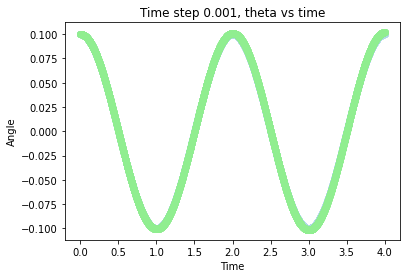

In [3]:
# Finite differences for the simple pendulum

import matplotlib.pyplot as plt
import numpy as np
import scipy
import time
i=1
# set up problem parameters
l = 1 # length of simple pendulum in meters
g  = 9.87 # gravity
omega = np.sqrt(g/l) # Natural frequency
T = 4.   # final time in seconds
K=[0.05, 0.025, 0.0125, 0.001]
for k in K:
  M = int(T/k)   # number of time steps
  t = np.arange(M)*k
  #t1 = np.arrange(M)
  print ("time step =", k)

  # define the initial data
  theta0 = 0.1
  v0 = 0.
  theta1 = theta0
  v1 = v0

  thetaE = np.zeros(M)
  thetaN = np.zeros(M)
  thetaN[0] = theta0
  # analytical linear solution
  for j in range(M):
      thetaE[j] = theta0*np.cos(omega*t[j])

  # forward in time
  def ftheta(theta, v):
      thetadot = v/l
      thetaF = theta + k*thetadot
      return thetaF

  def fv(theta,v):
      vdot = -g*np.sin(theta)
      vF = v + k*vdot
      return vF

  for j in range(1,M):
      theta2 = ftheta(theta1,v1)
      v2 = fv(theta1,v1)
      thetaN[j] = theta2
      theta1 = theta2
      v1 = v2
  
  plt.plot(t, thetaE, linewidth=2, color='lightblue', marker='o')
  plt.plot(t, thetaN, linewidth=2, color='lightgreen', marker='o')
  plt.title('Time step {}, theta vs time'.format(k))
  plt.xlabel('Time')
  plt.ylabel('Angle')
  plt.show()

Length is = 1


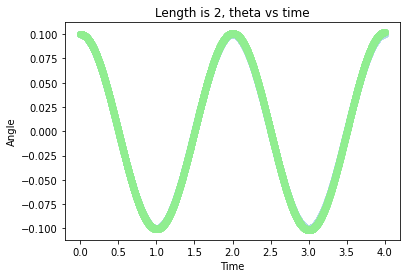

Length is = 2


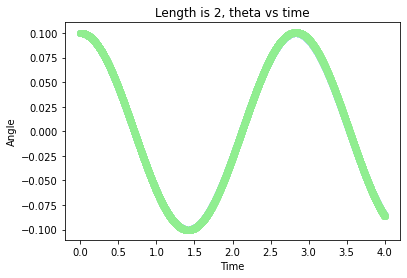

Length is = 3


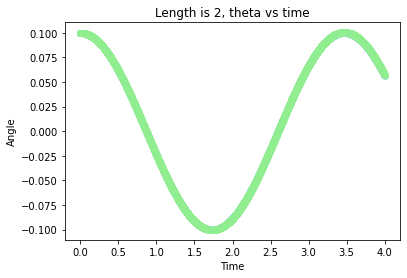

Length is = 4


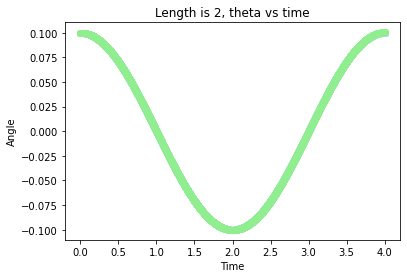

In [ ]:
# Finite differences for the simple pendulum

# Here we consider the simple harmonic motion d^\theta/dt^2 + g/l \sin\theta = 0
# an interval with periodicity.

import matplotlib.pyplot as plt
import numpy as np
import scipy
import time
i=1
# set up problem parameters
g  = 9.87 # gravity
T = 4.   # final time in seconds
k = 0.001 # delta t
#print ("Array = ", t1)
L=[1,2,3,4]
for l in L:
  omega = np.sqrt(g/l) # Natural frequency
  M = int(T/k)   # number of time steps
  t = np.arange(M)*k
  #t1 = np.arrange(M)
  print ("Length is =", l)

  # define the initial data
  theta0 = 0.1
  v0 = 0.
  theta1 = theta0
  v1 = v0

  thetaE = np.zeros(M)
  thetaN = np.zeros(M)
  thetaN[0] = theta0
  # analytical linear solution
  for j in range(M):
      thetaE[j] = theta0*np.cos(omega*t[j])

  #np.set_printoptions(threshold=np.inf)

  # forward in time
  def ftheta(theta, v):
      thetadot = v/l
      thetaF = theta + k*thetadot
      return thetaF

  def fv(theta,v):
      vdot = -g*np.sin(theta)
      vF = v + k*vdot
      return vF

  for j in range(1,M):
      theta2 = ftheta(theta1,v1)
      v2 = fv(theta1,v1)
      thetaN[j] = theta2
      theta1 = theta2
      v1 = v2
  '''    
  f=plt.subplot(2, 2, i)
  f.set_figheight(15)
  f.set_figwidth(15)
  f.plot(t, thetaE, linewidth=2, color='lightblue', marker='o')
  f.plot(t, thetaN, linewidth=2, color='lightgreen', marker='o')
  fig, (ax1,ax2,ax3,ax4) = plt.subplots(2, 2)
  axs1.plot(x, y)
  axs1.set_title('Time step 0.05, theta vs time')
  axs[0, 1].plot(t, thetaE, linewidth=2, color='lightblue', marker='o')
  axs[0, 1].set_title('Time step 0.05, theta vs time')
  axs[1, 0].plot(x, -y, 'tab:green')
  axs[1, 0].set_title('Time step 0.05, theta vs time')
  axs[1, 1].plot(x, -y, 'tab:red')
  axs[1, 1].set_title('Time step 0.05, theta vs time')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')
  
  fig, ax = plt.subplots(4,1,figsize=(15,15))
  ax[i-1].set_xlim(0, T)
  ax[i-1].grid(True)
  ax[i-1].plot(t, thetaE, linewidth=2, color='lightblue', marker='o')
  ax[i-1].plot(t, thetaN, linewidth=2, color='lightgreen', marker='o')
  i=i+1
  plt.close()
plt.show()
'''
  plt.plot(t, thetaE, linewidth=2, color='lightblue', marker='o')
  plt.plot(t, thetaN, linewidth=2, color='lightgreen', marker='o')
  plt.title('Length is {}, theta vs time'.format(L[i]))
  plt.xlabel('Time')
  plt.ylabel('Angle')
  plt.show()

k/h^2 = 5.625


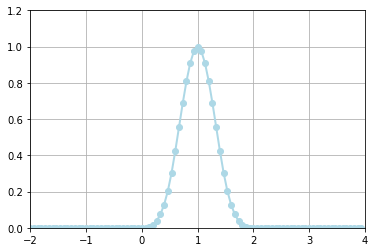

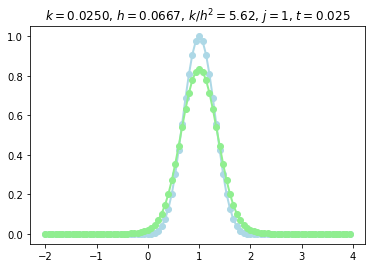

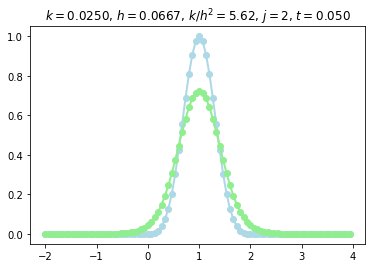

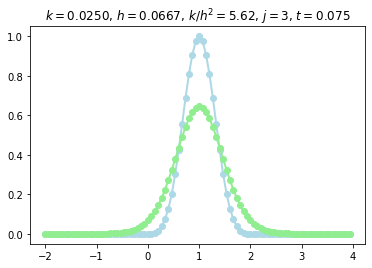

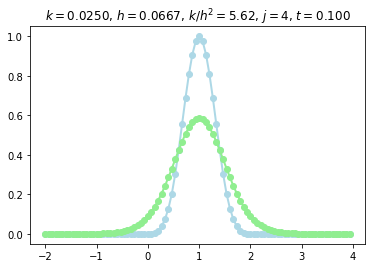

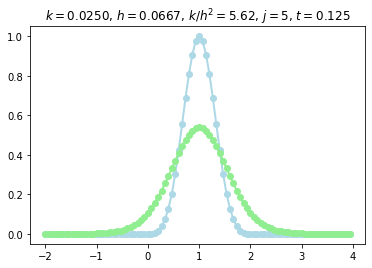

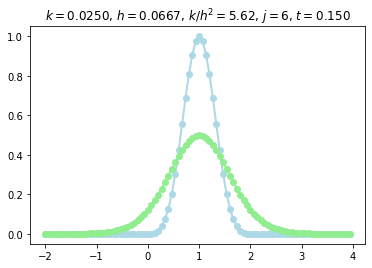

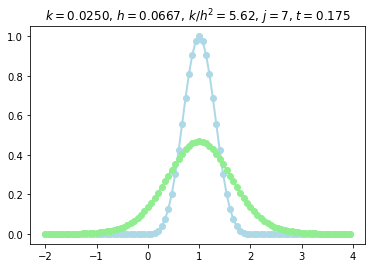

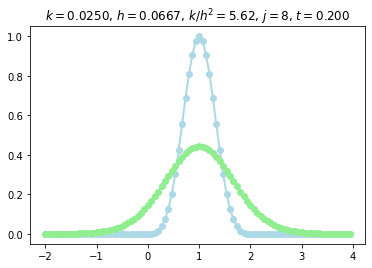

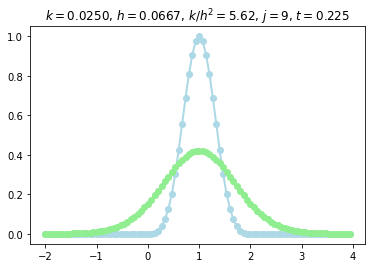

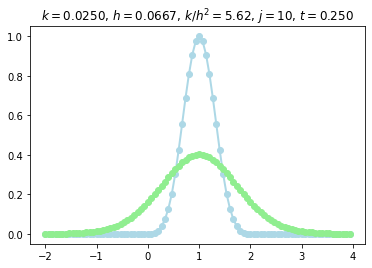

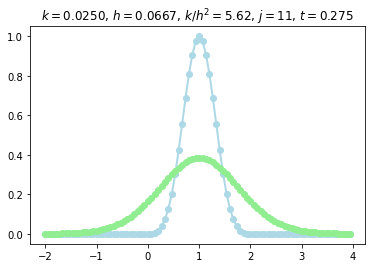

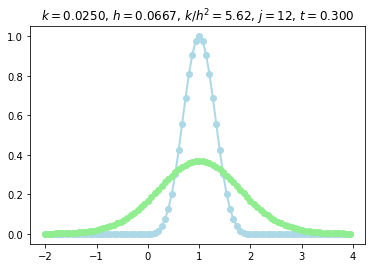

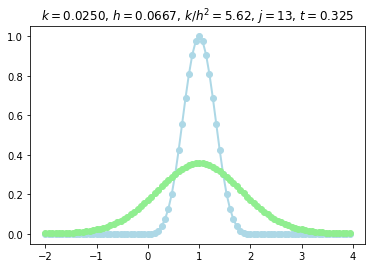

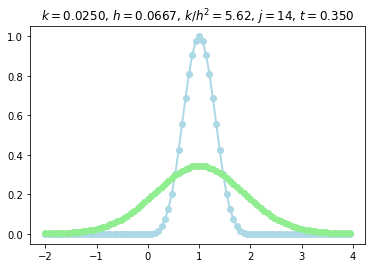

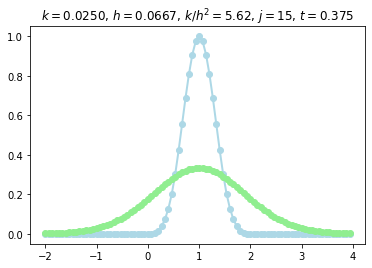

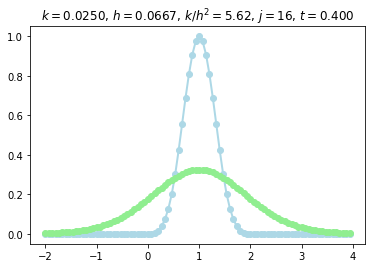

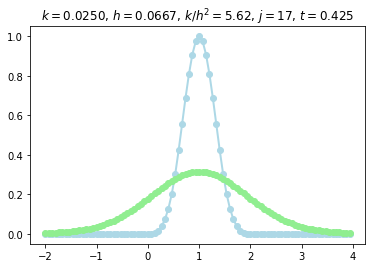

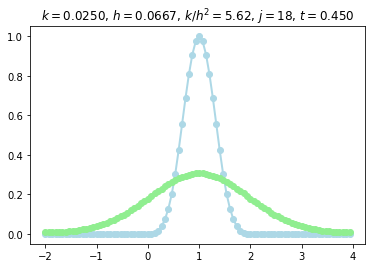

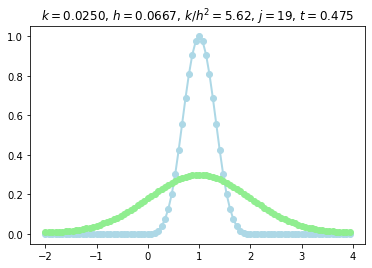

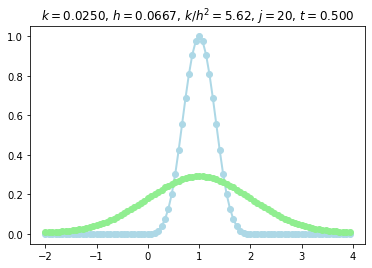

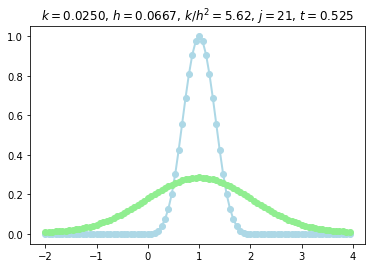

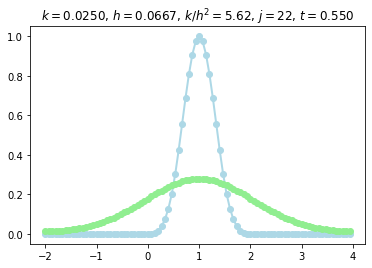

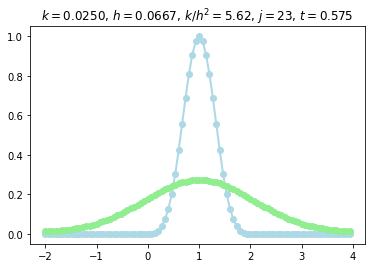

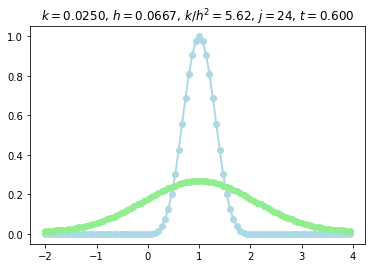

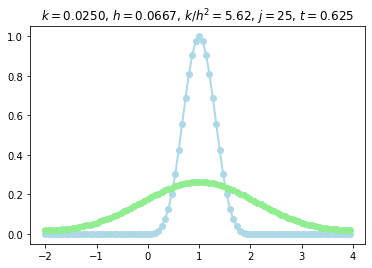

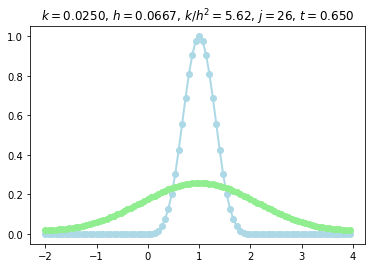

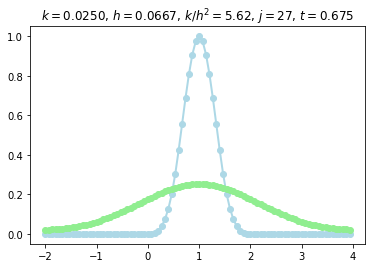

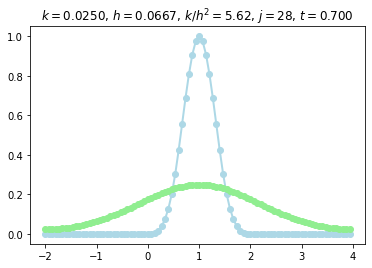

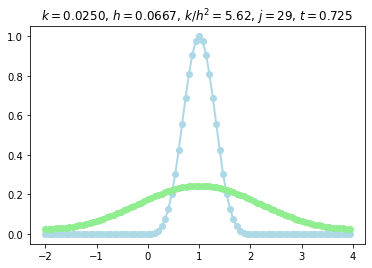

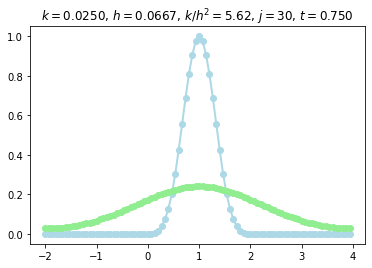

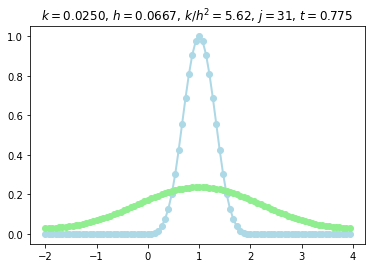

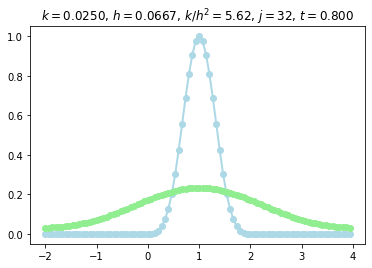

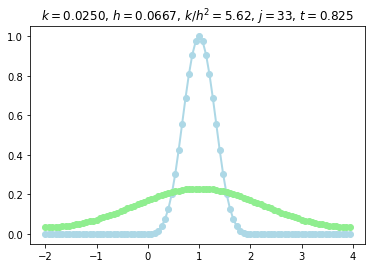

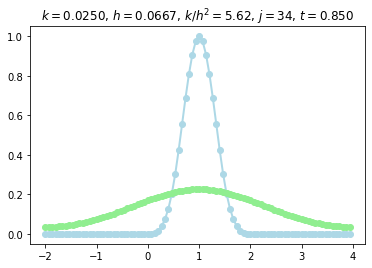

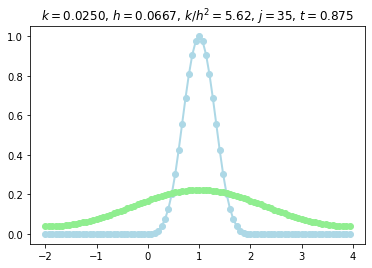

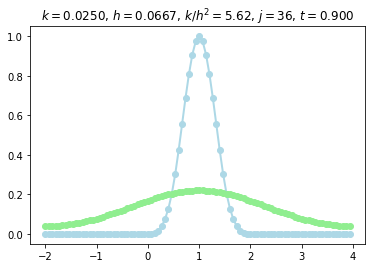

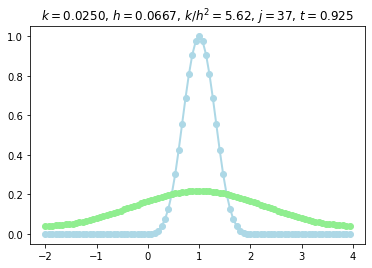

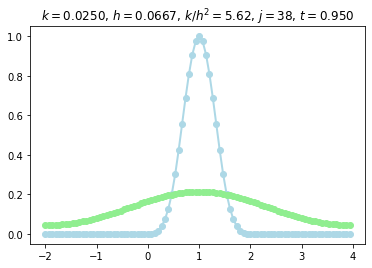

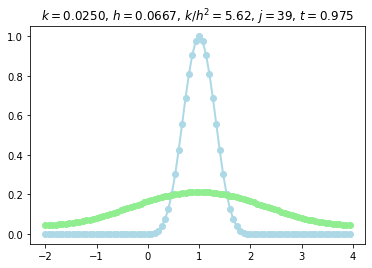

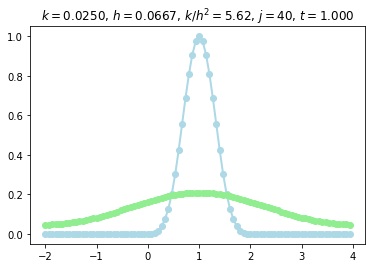

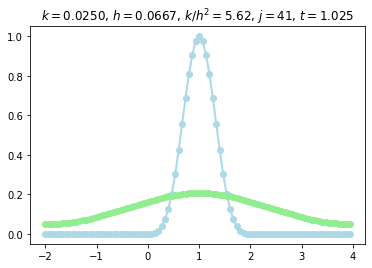

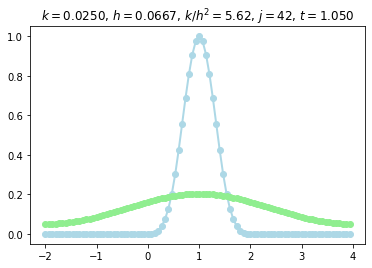

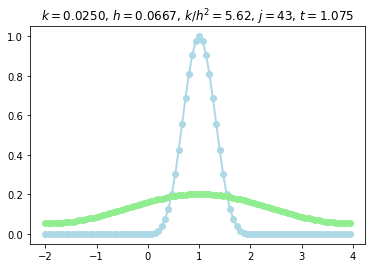

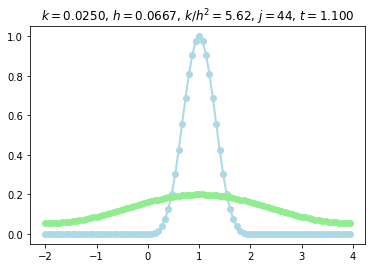

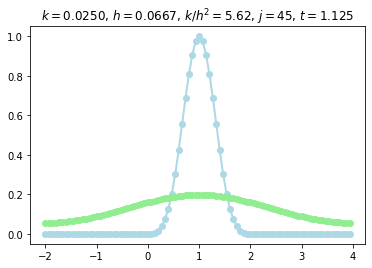

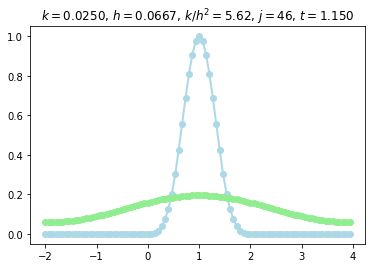

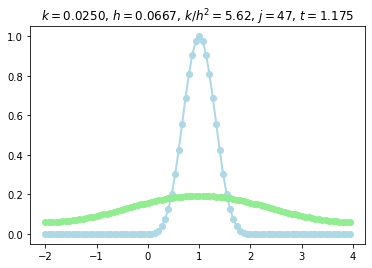

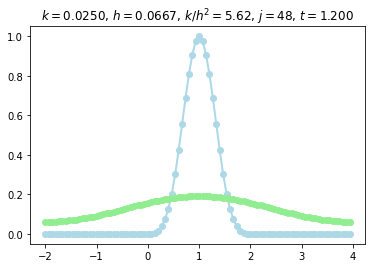

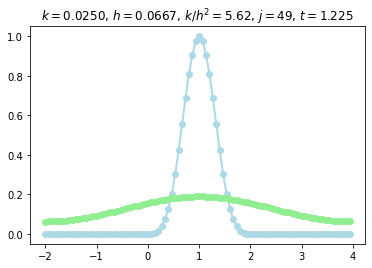

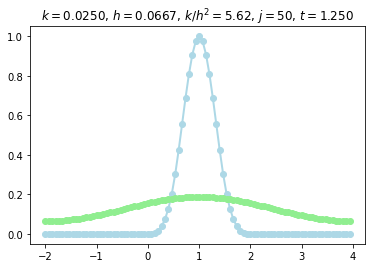

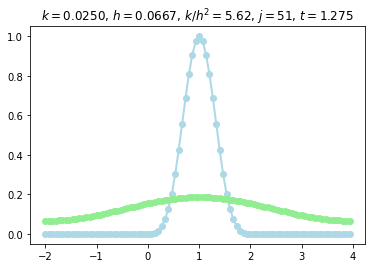

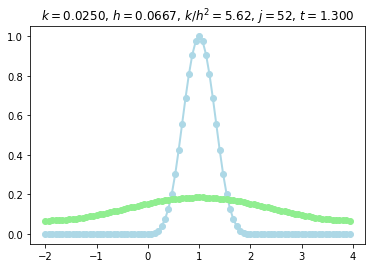

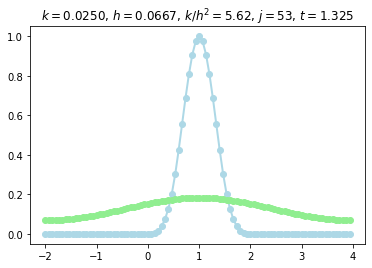

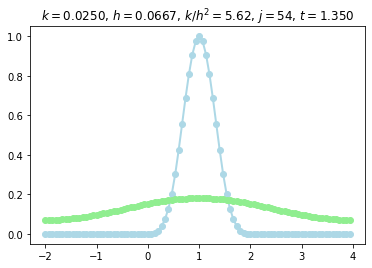

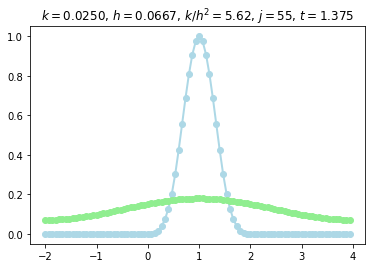

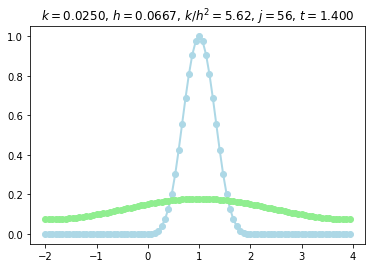

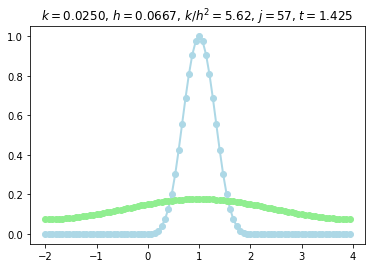

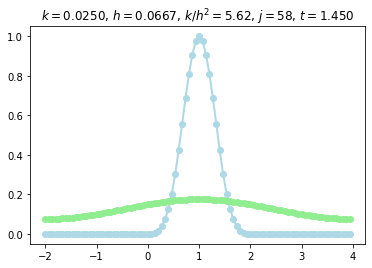

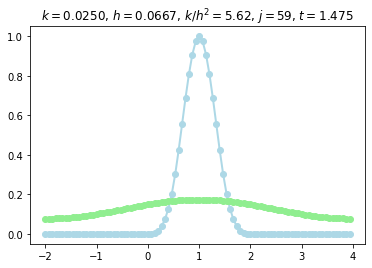

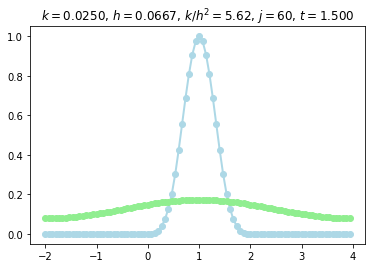

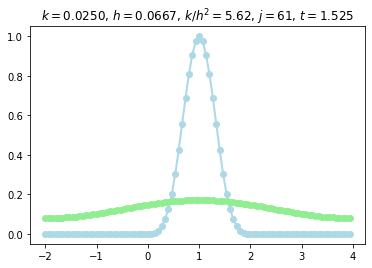

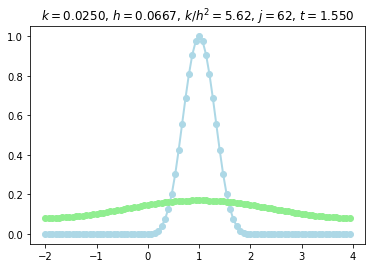

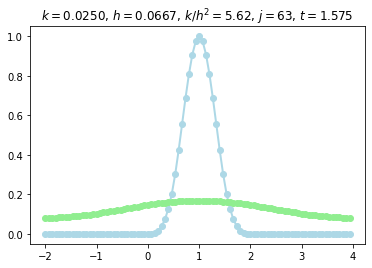

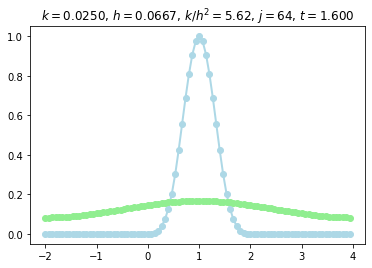

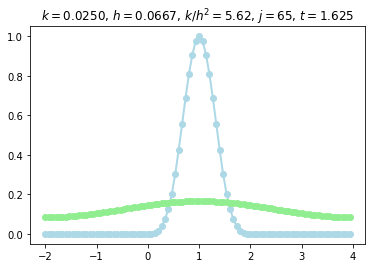

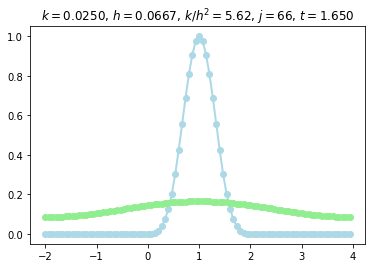

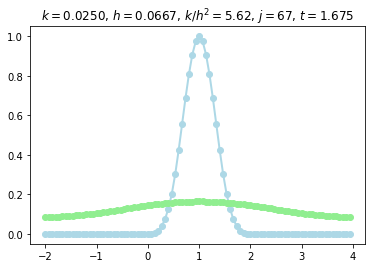

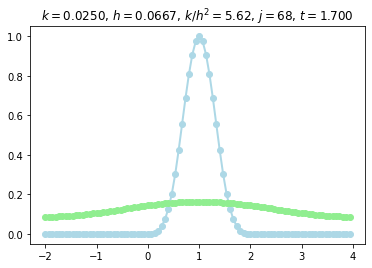

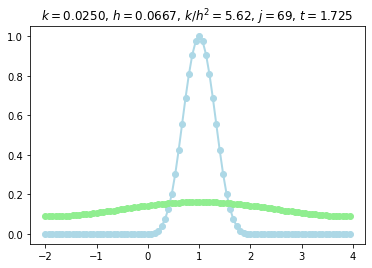

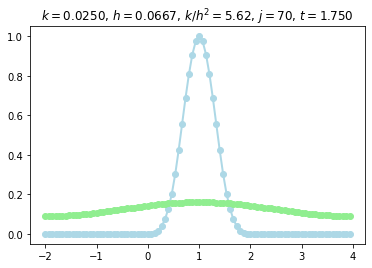

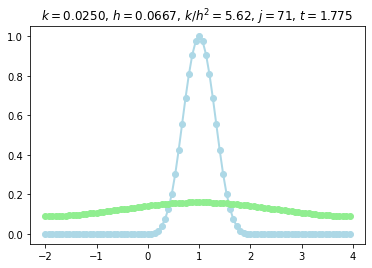

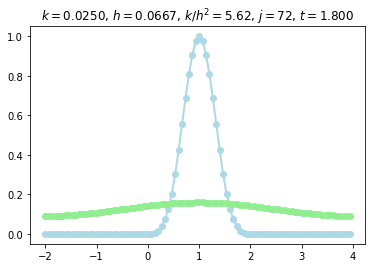

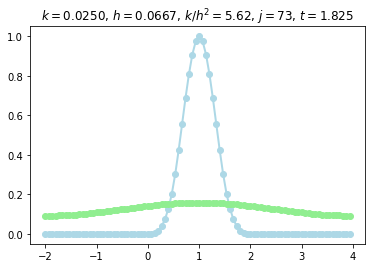

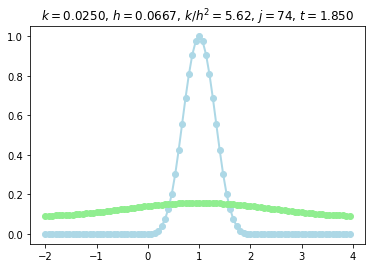

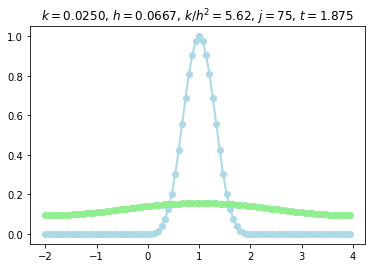

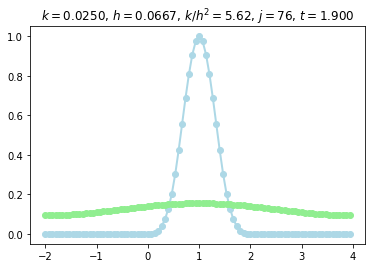

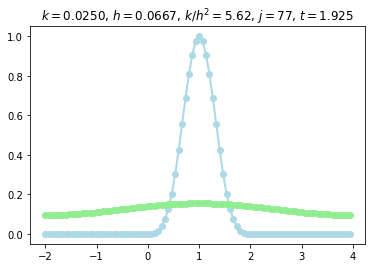

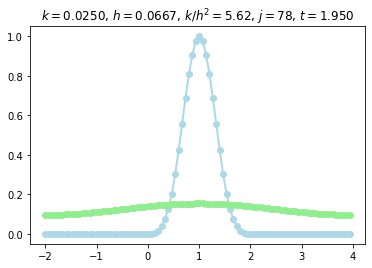

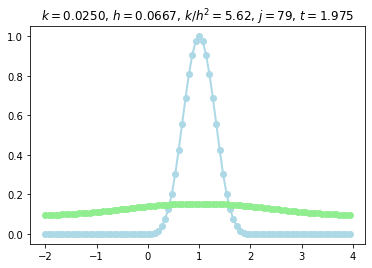

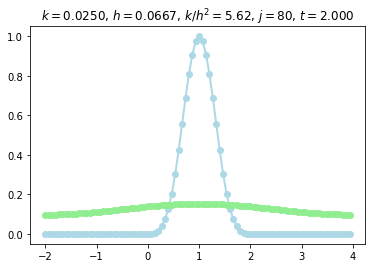

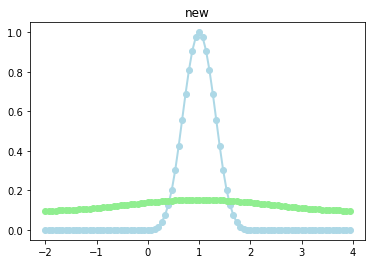

In [ ]:
# Finite differences for the heat equation

# Here we consider the heat equation  du/dt - d^2 u/dx^2 = 0  on
# an interval with periodicity.

import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.interpolate import UnivariateSpline  # spline used to define initial data
from scipy.sparse.linalg import spsolve  # sparse solver used for implicit methods
import time

# set up problem parameters
show_animation = True   # if true every time step is plotted, not only the final time
x0 = -2. # left end point
x1 = 4.  # right end point
T = 2.   # final time
N = 90   # number of spatial intervals
M = 80   # number of time steps
h = (x1 - x0)/N  # mesh spacing
k = T/M          # time step
x = x0 + np.arange(N)*h  # spatial mesh points (leave out x1, since it is identified with x0 by periodicity)
print ("k/h^2 = {}".format(k/h**2))

# define the initial data, here a cubic B-spline supported in [-1, 1]
xs = np.linspace(-2., 4., 13)
ys = np.array([0., 0., 0., 0., 0., .25, 1., .25, 0., 0., 0., 0., 0.])
spline = UnivariateSpline(xs, ys, s=0) # interpolating spline
u0 = spline(x) # evaluate initial data at mesh points

## Define various finite difference methods

# forward differences (conditionally stable)
def fd(u):
    um = np.roll(u, 1)
    up = np.roll(u, -1)
    unew = u + k/h**2 * (up - 2.*u + um)
    return unew

# for implicit methods set up left and right shift matrices
Kp = scipy.sparse.diags([np.ones(1), np.ones(N - 1)], [1 - N, 1]) # left shift
Km = scipy.sparse.diags([np.ones(1), np.ones(N - 1)], [N - 1, -1]) # right shift

# backward differences (implicit, unconditionally stable
def bd(u):
    Id = scipy.sparse.eye(N)
    unew = spsolve( (1 + 2*k/h**2) * Id - k/h**2 * (Kp + Km), u)
    return unew

# Crank-Nicolson (implicit, 2nd order in time, unconditionally stable
def cn(u):
    Id = scipy.sparse.eye(N)
    unew = spsolve( (1 + k/h**2) * Id - 0.5*k/h**2 * (Kp + Km), (1 - k/h**2)* u + 0.5*k/h**2 * (Kp + Km)*u)
    return unew

plt.ion() # interactive mode is required for the animation
u = np.copy(u0)
fig, ax = plt.subplots(1, 1)
ax.set_xlim(x0, x1)
ax.set_ylim(0., 1.2)
ax.grid(True)
ax.plot(x, u, linewidth=2, color='lightblue', marker='o')
plt.show() # create the window


for j in range(M):
    # advance solution one timestep
    u = bd(u)
    if show_animation:
        # clear plot and replot initial data
        ax.clear()
        ax.set_xlim(x0, x1)
        ax.set_ylim(0., 1.2)
        ax.grid(True)
        plt.plot(x, u0, linewidth=2, color='lightblue', marker='o')
        plt.plot(x, u, linewidth=2, color='lightgreen', marker='o')
        plt.title(r'$k = {:6.4f}$, $h = {:6.4f}$, $k/h^2 = {:4.2f}$, $j = {:4}$, $t = {:7.3f}$'.format(k, h, k/h**2, j+1, (j+1)*k))
        plt.show() # update the window
        fig.canvas.flush_events(); time.sleep(.05) # set the frame advance rate here
# show the final result
plt.ioff()
ax.clear()
ax.set_xlim(x0, x1)
ax.set_ylim(0., 1.2)
ax.grid(True)
plt.plot(x, u0, linewidth=2, color='lightblue', marker='o')
plt.plot(x, u, linewidth=2, color='lightgreen', marker='o')
#plt.title(r'$k = {:6.4f}$, $h = {:6.4f}$, $k/h^2 = {:4.2f}$, $j = {:4}$, $t = {:7.3f}$'.format(k, h, k/h**2, j+1, (j+1)*k))
plt.title('new')
#plt.plot(x,u)
plt.show()


k/h^2 = 9.0
M is 50


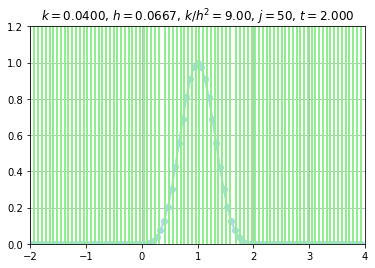

k/h^2 = 4.5
M is 100


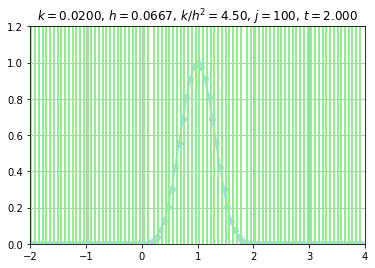

k/h^2 = 0.5625
M is 800


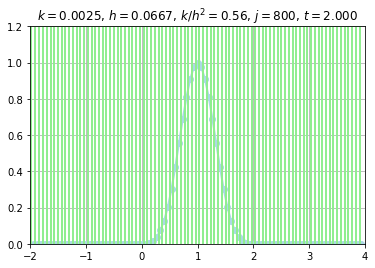

k/h^2 = 0.45
M is 1000


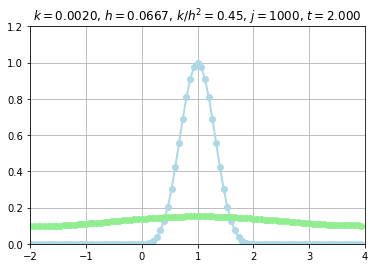

In [3]:
# Finite differences for the heat equation

# Here we consider the heat equation  du/dt - d^2 u/dx^2 = 0  on
# an interval with periodicity.

import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.interpolate import UnivariateSpline  # spline used to define initial data
from scipy.sparse.linalg import spsolve  # sparse solver used for implicit methods
import time
for M in [50,100,800,1000]:
  # set up problem parameters
  show_animation = False   # if true every time step is plotted, not only the final time
  x0 = -2. # left end point
  x1 = 4.  # right end point
  T = 2.   # final time
  N = 90   # number of spatial intervals
  h = (x1 - x0)/N  # mesh spacing
  k = T/M          # time step
  x = x0 + np.arange(N)*h  # spatial mesh points (leave out x1, since it is identified with x0 by periodicity)
  print ("k/h^2 = {}".format(k/h**2))

  # define the initial data, here a cubic B-spline supported in [-1, 1]
  xs = np.linspace(-2., 4., 13)
  ys = np.array([0., 0., 0., 0., 0., .25, 1., .25, 0., 0., 0., 0., 0.])
  spline = UnivariateSpline(xs, ys, s=0) # interpolating spline
  u0 = spline(x) # evaluate initial data at mesh points
  unew= np.zeros((u0.shape[0]+2))
  un= np.zeros((u0.shape[0]))
  utemp= np.zeros((u0.shape[0]+2))

  ## Define various finite difference methods

  # forward differences (conditionally stable)
  def fd(u):
    utemp[0]=u[0]
    utemp[-1]=u[-1]
    utemp[1:N+1]=u[0:N]
#    utemp[1:N]=utemp[]
    for g in range(1,N+1):
      unew[g]=utemp[g]+k/h**2*(utemp[g+1]-2*utemp[g]+utemp[g-1])
    un=unew[1:N+1]
    return un
  plt.ion() # interactive mode is required for the animation
  u = np.copy(u0)
  fig, ax = plt.subplots(1, 1)
  #plt.show() # create the window
  ax.set_xlim(x0, x1)
  ax.set_ylim(0., 1.2)
  ax.grid(True)
  plt.plot(x, u, linewidth=2, color='lightblue', marker='o')
  for j in range(M):
      # advance solution one timestep
      u = fd(u)
      if show_animation:
          # clear plot and replot initial data
          ax.clear()
          ax.set_xlim(x0, x1)
          ax.set_ylim(0., 1.2)
          ax.grid(True)
          plt.plot(x, u0, linewidth=2, color='lightblue', marker='o')
          plt.plot(x, u, linewidth=2, color='lightgreen', marker='o')
          plt.title(r'$k = {:6.4f}$, $h = {:6.4f}$, $k/h^2 = {:4.2f}$, $j = {:4}$, $t = {:7.3f}$'.format(k, h, k/h**2, j+1, (j+1)*k))
          plt.show() # update the window
          fig.canvas.flush_events(); time.sleep(.05) # set the frame advance rate here
  # show the final result
  plt.ioff()
  ax.clear()
  print('M is {}'.format(M))
  ax.set_xlim(x0, x1)
  ax.set_ylim(0., 1.2)
  ax.grid(True)
  plt.plot(x, u0, linewidth=2, color='lightblue', marker='o')
  plt.plot(x, u, linewidth=2, color='lightgreen', marker='o')
  plt.title(r'$k = {:6.4f}$, $h = {:6.4f}$, $k/h^2 = {:4.2f}$, $j = {:4}$, $t = {:7.3f}$'.format(k, h, k/h**2, j+1, (j+1)*k))
  plt.show()


k/h^2 = 9.0
M is 50


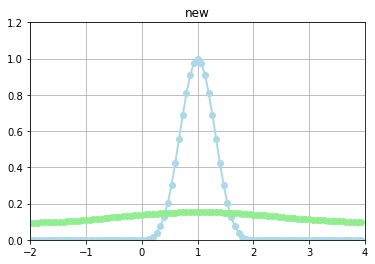

k/h^2 = 4.5
M is 100


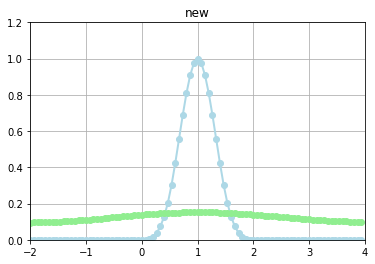

k/h^2 = 0.5625
M is 800


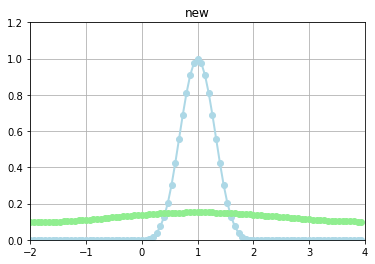

k/h^2 = 0.45
M is 1000


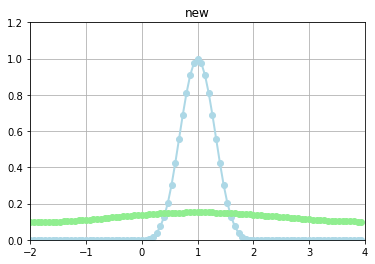

In [11]:
# Finite differences for the heat equation

# Here we consider the heat equation  du/dt - d^2 u/dx^2 = 0  on
# an interval with periodicity.

import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.interpolate import UnivariateSpline  # spline used to define initial data
from scipy.sparse.linalg import spsolve  # sparse solver used for implicit methods
import time

# set up problem parameters
show_animation = False   # if true every time step is plotted, not only the final time
x0 = -2. # left end point
x1 = 4.  # right end point
T = 2.   # final time
N = 90   # number of spatial intervals
for M in [50,100,800,1000]:   # number of time steps
  h = (x1 - x0)/N  # mesh spacing
  k = T/M 
  f = k/h**2        # time step
  x = x0 + np.arange(N)*h  # spatial mesh points (leave out x1, since it is identified with x0 by periodicity)
  print ("k/h^2 = {}".format(k/h**2))

  # define the initial data, here a cubic B-spline supported in [-1, 1]
  xs = np.linspace(-2., 4., 13)
  ys = np.array([0., 0., 0., 0., 0., .25, 1., .25, 0., 0., 0., 0., 0.])
  spline = UnivariateSpline(xs, ys, s=0) # interpolating spline
  u0 = spline(x) # evaluate initial data at mesh points

  ## Define various finite difference methods

  K=np.zeros((N,N))
  for i in range(N-1):
    K[i][i]=1+2*f
    K[i][i+1]=-f
    K[i+1][i]=-f
  K[N-1][N-1]=f+1
  K[0][0]=f+1

  Kinv = np.linalg.pinv(K)
  def bd1(u):
    unew = np.matmul(Kinv, u)
    return unew 
  plt.ion() # interactive mode is required for the animation
  u = np.copy(u0)
  fig, ax = plt.subplots(1, 1)
  ax.set_xlim(x0, x1)
  ax.set_ylim(0., 1.2)
  ax.grid(True)
#  ax.plot(x, u, linewidth=2, color='lightblue', marker='o')
#  plt.show() # create the window

  for j in range(M):
      # advance solution one timestep
      u = bd1(u)
      if show_animation:
          # clear plot and replot initial data
          ax.clear()
          ax.set_xlim(x0, x1)
          ax.set_ylim(0., 1.2)
          ax.grid(True)
          plt.plot(x, u0, linewidth=2, color='lightblue', marker='o')
          plt.plot(x, u, linewidth=2, color='lightgreen', marker='o')
          plt.title(r'$k = {:6.4f}$, $h = {:6.4f}$, $k/h^2 = {:4.2f}$, $j = {:4}$, $t = {:7.3f}$'.format(k, h, k/h**2, j+1, (j+1)*k))
          plt.show() # update the window
          fig.canvas.flush_events(); time.sleep(.05) # set the frame advance rate here
  # show the final result
  plt.ioff()
  print('M is {}'.format(M))
  ax.clear()
  ax.set_xlim(x0, x1)
  ax.set_ylim(0., 1.2)
  ax.grid(True)
  plt.plot(x, u0, linewidth=2, color='lightblue', marker='o')
  plt.plot(x, u, linewidth=2, color='lightgreen', marker='o')
  #plt.title(r'$k = {:6.4f}$, $h = {:6.4f}$, $k/h^2 = {:4.2f}$, $j = {:4}$, $t = {:7.3f}$'.format(k, h, k/h**2, j+1, (j+1)*k))
  plt.title('new')
  #plt.plot(x,u)
  plt.show()


size of x (101,)
0.01
[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.  ]
[[ 2.00000001 -1.          0.         ...  0.          0.
   0.        ]
 [-1.          2.00000004 -1.         ...  0.          0.
   0.        ]
 [ 0.         -1.          2.00000009 ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  2.00009409 -1.
   0.        ]
 [ 0.          0.          0.         ... -1.          2.00009604
  -1.        ]
 [ 0.          0.          0.         ...  0.         -1.
   2.00009801]]
[9.99983333e

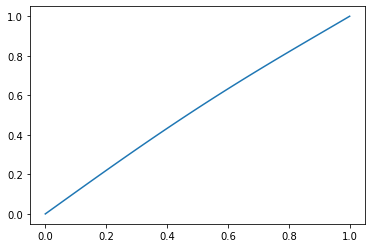

In [30]:
# Finite differences for the heat equation

# Here we consider the heat equation  du/dt - d^2 u/dx^2 = 0  on
# an interval with periodicity.

import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.interpolate import UnivariateSpline  # spline used to define initial data
from scipy.sparse.linalg import spsolve  # sparse solver used for implicit methods
import time

# set up problem parameters
x0 = 0. # left end point
x1 = 1  # right end point
N = 100   # number of spatial intervals
h = (x1 - x0)/N  # mesh spacing
x = x0 + np.arange(N+1)*h  # spatial mesh points (leave out x1, since it is identified with x0 by periodicity)
print("size of x {}".format(x.shape))
print(h)

u=np.zeros((N+1))
u[0]=0
u[N]=1

## Define various finite difference methods

K=np.zeros((N-1,N-1))
g = np.zeros(N-1)
for i in range(N-2):
  K[i][i]=2+x[i+1]**2*(h**2)
  K[i][i+1]=-1
  K[i+1][i]=-1
  g[i]=(h**2)*np.sin(x[i+1])
K[N-2][N-2]=2+x[N-1]**2*(h**2)
g[0]=g[0]+u[0]
g[N-2]=(h**2)*np.sin(x[N-1])+u[-1]
print(x)
print(K)
print(g)
Kinv = np.linalg.pinv(K)
u[1:N] = np.matmul(Kinv,g)

plt.plot(x,u)
plt.show()